In [1]:
import anndata as ad
import scvi
import scanpy as sc
import mrvi
import pandas as pd
import scipy as sp
import numpy as np
import pickle as pkl
from sklearn.cluster import KMeans
import igraph as ig
import leidenalg as la

Global seed set to 0
/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [2]:
# adata = sc.read('./../data/MrVIoutputs/bacdrop.h5ad')

with open('./../data/pickles/mrvi_model.pickle', 'rb') as instream:
    model = pkl.load(instream)

with open('./../data/pickles/sample_distances.pickle', 'rb') as instream:
    sample_distances = pkl.load(instream)

with open('./../data/pickles/sample_representations.pickle', 'rb') as instream:
    sample_representations = pkl.load(instream)

In [3]:
model.adata

AnnData object with n_obs × n_vars = 34410 × 3766
    obs: 'sample', 'replicate', '_scvi_sample', '_scvi_labels', 'n_genes'
    var: 'n_cells'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_categorical_nuisance_keys', 'X_mrvi_z', 'X_mrvi_u'

In [15]:
local_sample_rep = sample_representations
local_sample_rep.shape

(1692542, 4, 10)

In [5]:
cell_sample_sample_distances = sample_distances

In [6]:
# Latent space dims = 10, Num sample conds = 4, num batches = 2, n_cells = 1692542, n_genes = 4628

In [7]:
# TODO: cluster in latent space, track which cells are in which clusters use indices, those same indices can be used to get the expression vectors for those cells, those
# expression vectors tell you which genes are big in each cluster!  

In [16]:
k=10
kmeans = KMeans(n_clusters=k)
kmeans.fit(model.adata.obsm['X_mrvi_u'])
labels = kmeans.labels_
np.unique(kmeans.labels_, return_counts=True) # clusters and the number of genes assigned to each cluster

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([34390,     1,     2,     2,     1,     3,     1,     4,     5,
            1]))

In [23]:
sc.pp.neighbors(model.adata, use_rep='X_mrvi_z', knn=True)

In [24]:
sc.tl.umap(model.adata)

In [25]:
sc.tl.leiden(model.adata)

In [27]:
sc.tl.rank_genes_groups(model.adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(model.adata, n_genes=25, sharey=False)

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


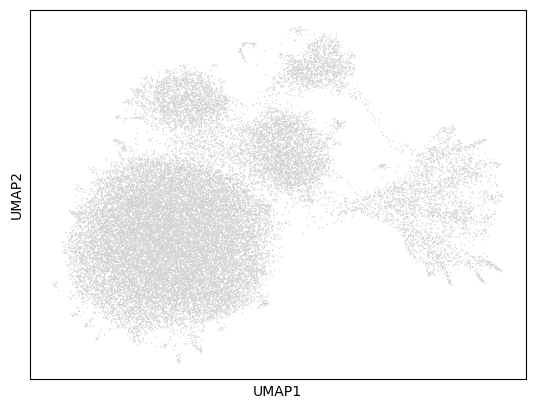

In [29]:
sc.pl.umap(model.adata, use_raw=False)